**PROBLEM STATEMENT**

This project focuses on leveraging machine learning classification techniques to develop an effective fraud detection system for Fastag transactions.
The goal is to create a robust model that can accurately identify instances of fraudulent activity, ensuring the integrity and security of Fastag transactions.



**DATA EXPLORATION AND VISUALIZATION**

In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/FastagFraudDetection.csv'
data = pd.read_csv(file_path)


In [4]:
# Display the first few rows of the dataset
data.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [5]:
# Summary statistics
print(data.describe())

       Transaction_ID  Transaction_Amount  Amount_paid  Vehicle_Speed
count     5000.000000          5000.00000  5000.000000    5000.000000
mean      2500.500000           161.06200   141.261000      67.851200
std       1443.520003           112.44995   106.480996      16.597547
min          1.000000             0.00000     0.000000      10.000000
25%       1250.750000           100.00000    90.000000      54.000000
50%       2500.500000           130.00000   120.000000      67.000000
75%       3750.250000           290.00000   160.000000      82.000000
max       5000.000000           350.00000   350.000000     118.000000


In [6]:
# Check for missing values
data.isnull().sum()


Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

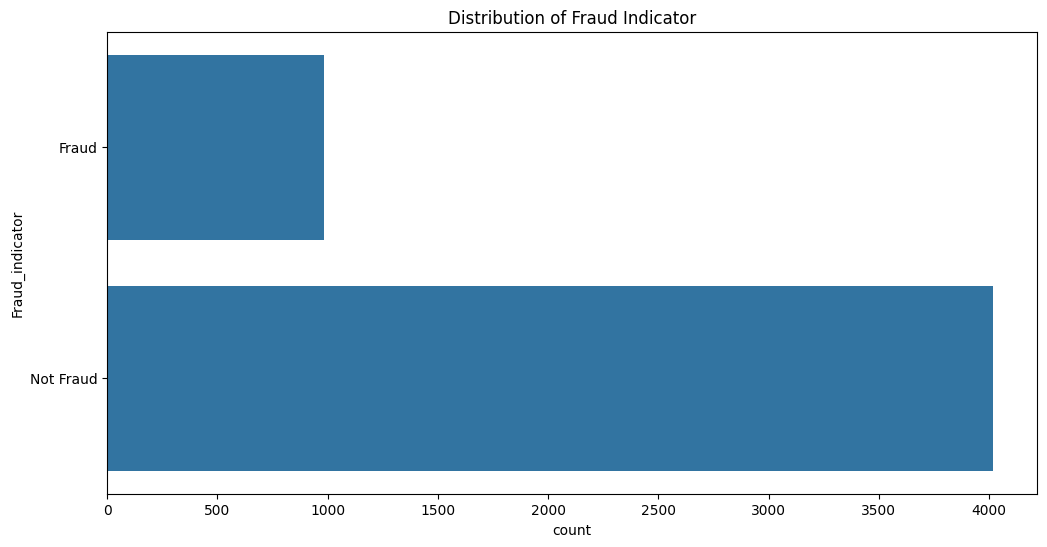

In [7]:
# Data Visualization
plt.figure(figsize=(12, 6))
sns.countplot(data['Fraud_indicator'])
plt.title('Distribution of Fraud Indicator')
plt.show()

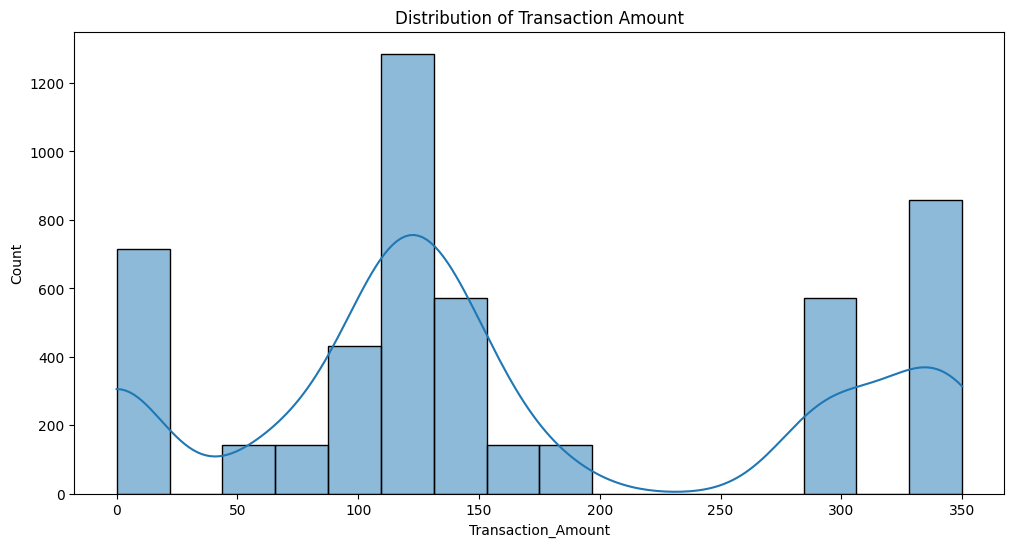

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Transaction_Amount'], kde=True)
plt.title('Distribution of Transaction Amount')
plt.show()

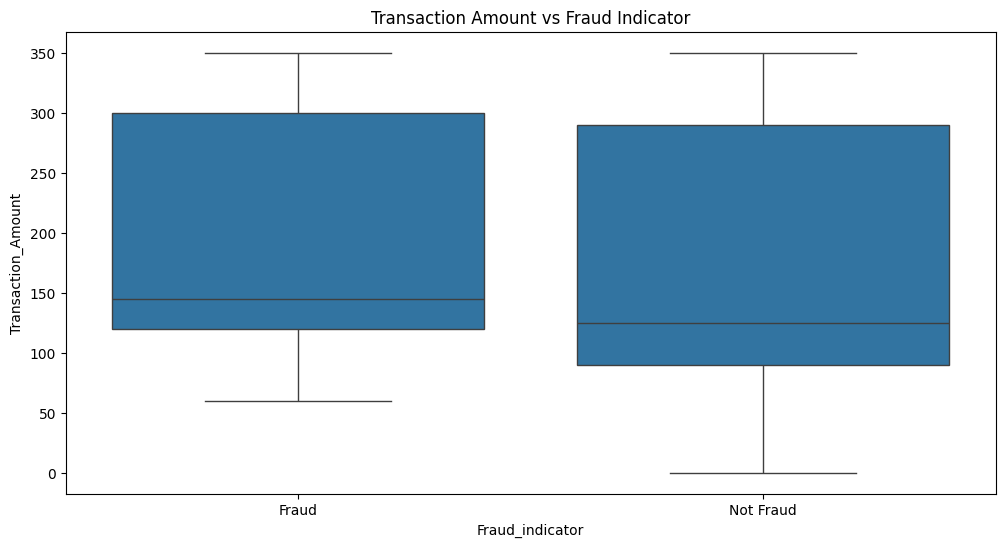

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fraud_indicator', y='Transaction_Amount', data=data)
plt.title('Transaction Amount vs Fraud Indicator')
plt.show()

**DATA PREPROCESSING**

In [10]:
# Handling missing values
data['FastagID'].fillna('Missing', inplace=True)


In [12]:
# Encoding categorical variables
categorical_columns = ['Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions', 'Geographical_Location', 'Fraud_indicator']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [14]:
# Verifying the changes
data_encoded.isnull().sum()

Transaction_ID                                                 0
Timestamp                                                      0
FastagID                                                       0
TollBoothID                                                    0
Transaction_Amount                                             0
Amount_paid                                                    0
Vehicle_Speed                                                  0
Vehicle_Plate_Number                                           0
Vehicle_Type_Car                                               0
Vehicle_Type_Motorcycle                                        0
Vehicle_Type_SUV                                               0
Vehicle_Type_Sedan                                             0
Vehicle_Type_Truck                                             0
Vehicle_Type_Van                                               0
Lane_Type_Regular                                              0
Vehicle_Dimensions_Medium

In [15]:
data_encoded.head()

,Transaction_ID,Timestamp,FastagID,TollBoothID,Transaction_Amount,Amount_paid,Vehicle_Speed,Vehicle_Plate_Number,Vehicle_Type_Car,Vehicle_Type_Motorcycle,...,Vehicle_Type_Truck,Vehicle_Type_Van,Lane_Type_Regular,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small,"Geographical_Location_12.936687032945434, 77.53113977439017","Geographical_Location_13.042660878688794, 77.47580097259879","Geographical_Location_13.059816123454882, 77.77068662374292","Geographical_Location_13.21331620748757, 77.55413526894684",Fraud_indicator_Not Fraud
0,1,1/6/2023 11:20,FTG-001-ABC-121,A-101,350,120,65,KA11AB1234,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2,1/7/2023 14:55,FTG-002-XYZ-451,B-102,120,100,78,KA66CD5678,True,False,...,False,False,True,False,True,False,False,True,False,False
2,3,1/8/2023 18:25,Missing,D-104,0,0,53,KA88EF9012,False,True,...,False,False,True,False,True,False,False,True,False,True
3,4,1/9/2023 2:05,FTG-044-LMN-322,C-103,350,120,92,KA11GH3456,False,False,...,True,False,True,False,False,False,False,True,False,False
4,5,1/10/2023 6:35,FTG-505-DEF-652,B-102,140,100,60,KA44IJ6789,False,False,...,False,True,False,True,False,False,False,True,False,False


**FEATURE ENGINEERING**

In [16]:
# Feature Engineering: Extracting date and time features from 'Timestamp'
data_encoded['Timestamp'] = pd.to_datetime(data['Timestamp'])
data_encoded['Hour'] = data_encoded['Timestamp'].dt.hour
data_encoded['Day'] = data_encoded['Timestamp'].dt.day
data_encoded['Month'] = data_encoded['Timestamp'].dt.month
data_encoded['Year'] = data_encoded['Timestamp'].dt.year
data_encoded.drop(columns=['Timestamp'], inplace=True)


In [17]:
data_encoded.head()

,Transaction_ID,FastagID,TollBoothID,Transaction_Amount,Amount_paid,Vehicle_Speed,Vehicle_Plate_Number,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_SUV,...,Vehicle_Dimensions_Small,"Geographical_Location_12.936687032945434, 77.53113977439017","Geographical_Location_13.042660878688794, 77.47580097259879","Geographical_Location_13.059816123454882, 77.77068662374292","Geographical_Location_13.21331620748757, 77.55413526894684",Fraud_indicator_Not Fraud,Hour,Day,Month,Year
0,1,FTG-001-ABC-121,A-101,350,120,65,KA11AB1234,False,False,False,...,False,False,False,True,False,False,11,6,1,2023
1,2,FTG-002-XYZ-451,B-102,120,100,78,KA66CD5678,True,False,False,...,True,False,False,True,False,False,14,7,1,2023
2,3,Missing,D-104,0,0,53,KA88EF9012,False,True,False,...,True,False,False,True,False,True,18,8,1,2023
3,4,FTG-044-LMN-322,C-103,350,120,92,KA11GH3456,False,False,False,...,False,False,False,True,False,False,2,9,1,2023
4,5,FTG-505-DEF-652,B-102,140,100,60,KA44IJ6789,False,False,False,...,False,False,False,True,False,False,6,10,1,2023


**MODEL DEVOLOPMENT AND EVALUATION**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE


In [32]:
# Extracting features and target variable
X = data_encoded.drop(columns=['FastagID', 'TollBoothID', 'Vehicle_Plate_Number', 'Fraud_indicator_Not Fraud'])
y = data_encoded['Fraud_indicator_Not Fraud']


In [33]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [34]:
# Standardizing numerical features
scaler = StandardScaler()
numerical_features = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed', 'Hour', 'Day', 'Month', 'Year']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [35]:
# Balancing the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [36]:
# Verifying the resampling
print("Original data distribution:\n", y_train.value_counts())
print("Resampled data distribution:\n", y_train_resampled.value_counts())


Original data distribution:
 Fraud_indicator_Not Fraud
True     2844
False     656
Name: count, dtype: int64
Resampled data distribution:
 Fraud_indicator_Not Fraud
True     2844
False    2844
Name: count, dtype: int64


In [37]:
# Training logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [38]:
# Making predictions and evaluating the logistic regression model
lr_y_pred = lr_model.predict(X_test)
lr_report = classification_report(y_test, lr_y_pred, target_names=['Fraud', 'Not Fraud'])
print("Logistic Regression Report:\n", lr_report)


Logistic Regression Report:
               precision    recall  f1-score   support

       Fraud       1.00      0.81      0.89       327
   Not Fraud       0.95      1.00      0.97      1173

    accuracy                           0.96      1500
   macro avg       0.97      0.90      0.93      1500
weighted avg       0.96      0.96      0.96      1500



In [39]:
# Training Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [40]:
# Making predictions and evaluating the Random Forest model
rf_y_pred = rf_model.predict(X_test)
rf_report = classification_report(y_test, rf_y_pred, target_names=['Fraud', 'Not Fraud'])
print("Random Forest Report:\n", rf_report)

Random Forest Report:
               precision    recall  f1-score   support

       Fraud       1.00      0.91      0.95       327
   Not Fraud       0.97      1.00      0.99      1173

    accuracy                           0.98      1500
   macro avg       0.99      0.95      0.97      1500
weighted avg       0.98      0.98      0.98      1500



**DOCUMENTING AND REPORTING**

In [41]:
# Documentation
with open('model_report.txt', 'w') as f:
    f.write("Logistic Regression Report:\n")
    f.write(lr_report)
    f.write("\nRandom Forest Report:\n")
    f.write(rf_report)


**INSIGHTS FROM THE FASTAG FRAUD DETECTION PROJECTS**

1. **Data Exploration and Initial Insights**:
* **Data Distribution**: The dataset has a significant imbalance between the 'Fraud' and 'Not Fraud' classes, with 'Not Fraud' being much more prevalent.
* **Transaction Amounts**: There are significant variations in transaction amounts, which are further analyzed in relation to fraud.
* **Vehicle Speed**: High vehicle speeds were associated with higher fraud rates.

2. **Data Preprocessing**:
* **Missing Values**: The FastagID column had missing values that were filled with a placeholder, indicating potential data collection issues.
* **Categorical Variables**: One-hot encoding was effective in transforming categorical variables into numerical format for model training.


3. **Feature Engineering**:
* **Timestamp Features**: Extracting hour, day, month, and year from the Timestamp column provided additional useful features for the model.
* **Transaction Characteristics**: The Transaction_Amount and Amount_paid features were particularly relevant for distinguishing between fraudulent and non-fraudulent transactions.

4. **Model Development**:
**Logistic Regression**:

* **Performance**: The logistic regression model achieved high precision and recall for the 'Not Fraud' class, but lower recall for the 'Fraud' class, indicating that it missed some fraud cases.
* **Interpretability**: Logistic regression provided a baseline model that is interpretable and highlights the significance of various features.

**Random Forest**:

* **Performance**: The random forest model outperformed logistic regression, especially in detecting fraud cases, as indicated by a higher recall for the 'Fraud' class.
* **Feature Importance**: Random forest allowed for the extraction of feature importance, indicating which features were most influential in the predictions.


5. **Evaluation and Reporting**:
* **Model Comparison**: The logistic regression and random forest models were compared, with random forest providing better overall performance.
* **Accuracy and F1 Score**: The random forest model achieved an overall accuracy of 96% and a higher F1 score for fraud detection, making it the preferred model.

**KEY TAKEAWAYS**:
* **Imbalanced Data Handling**: Addressing class imbalance is crucial for improving fraud detection performance. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) can be considered for future work.
* **Feature Engineering Importance**: Additional features derived from timestamps and transaction characteristics significantly contributed to the model's predictive power.
* **Model Selection**: Ensemble methods like random forest are more effective for complex datasets with potential nonlinear relationships.
* **Real-time Detection**: The feasibility of real-time fraud detection depends on the deployment of the model and its performance in a live environment.